#ML (Least Squares Classification)

We are required to design a multiple least squares-based classification algorithm that can recognize scanned
images of the 10 digits (0 to 9)
> **Important Project Notes:**
- 1. If the inverse of ˜XT˜X results in a singular matrix, use the pseudoinverse function.
- 2. We are allowed to use numpy and its
functions for transposing, inverting and multiplying matrices.


Team members:
1. AbdelRaouf Khorshed 5000267

###Importing Libraries 📚

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.3 MB/s 


In [ ]:
import patoolib
import pandas as pd
import numpy as np
from PIL import Image #Importing/exporting images
patoolib.extract_archive('/content/Data.zip')

patool: Extracting /content/Data.zip ...
patool: running /usr/bin/7z x -o./Unpack_cvotyo3j -- /content/Data.zip
patool: ... /content/Data.zip extracted to `Data'.


'Data'

###Project Code <>💻

Concept Understanding
- The least-squares method for classification is based on linearly separating 2 or more classes.
- The least-squares method (LSM) is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the offsets or residuals of points from the plotted curve (linear). 
- The Train folder contains 240 images for each digit—there are 10 digits (0–9), so 2400 in total and 200 test images (20 images for each digit).
- “Train/Test
Labels.txt” includes the labels of the correspodning images in order.

In [ ]:
width, height = Image.open('/content/Data/Train/1.jpg').size
print("Pixel size of each image:", width*height)

Pixel size of each image: 784


 We’re going to flatten the image to be just one big array, so the dimension of each image is going to be (1, 784) but LSM requires an extra dimension that’s in form of an extra column of ones therefore we will add an extra column.

In [ ]:
images = np.zeros([2400,785]) #2400 train images

We're going to create a function which takes one training image at a time, flattens it, adds a 1 to it, and puts it in the final array (X).

In [ ]:
#Each image's path is the same just ends with [Image number].jpg
#So we are able to loop through all the images.
def getX_tilde():
    path = "/content/Data/Train/" 
    X = np.zeros([2400, 785])
    for i in range(1, 2400): #Loop through all the images
        new_path = path + str(i) + ".jpg"
        image = Image.open(new_path) #Open the corresponding image
        flattened_image = np.append(np.asarray(image).flatten(order='C'), 1) #take the image array and flatten in row-major (2D --> 1D) and add the flattened image and the extra 1
        X[i-1] =  flattened_image
        
    return X

We're going to create another function to calculate the first part of the LSM formula: _((X_tilde.transpose)(X_tilde))^-1_, we're going to call it 'getFunction'.

In [ ]:
def getFunction(X_tilde):
    X_tilde_transpose = X_tilde.transpose()
    function_bracket = X_tilde_transpose.dot(X_tilde)
    inverse = np.linalg.pinv(function_bracket) 
    function = inverse.dot(X_tilde_transpose)

    return function

If the determinant of the matrix is zero it will not have an inverse and your inv function will not work. This usually happens if your matrix is singular. But pinv will. This is because pinv returns the inverse of your matrix when it is available and the pseudo inverse when it isn't.

Finally we're going to create another function which retreives W_tilde, first we determine t which is a matrix with all elements being -1 except the 240 indices which correspond to the wanted number. Then we multiple the function and t ti give us W_tilde

In [ ]:
def getW_tilde(function, num):
    t = np.zeros([2400]) #vector of zeros
    for i in range (2400): 
      t[i] = -1 #assign all values to -1 (opposing class)
    for i in range (240):
        t[(num*240)+i] = 1 # loop through correct class by starting with our wanted digit and assign value to 1. 

    #Now that we've determined t, we can calculate W_tilde
    W_tilde = function.dot(t)
    return W_tilde

We can finally create the test function, where we take each test image and get its corresponding weight vector. We output the highest value in the weight vector (highest probability) and output its corresponding class (0-9).

In [ ]:
def test(test_path):
    function = getFunction(getX_tilde())
    predictedLabels = np.zeros([200])
    
    #We want to compare every test image with the 
    for i in range(1, 200): #Loop through all the test images 
        Y = np.zeros([10]) #reset Y after each loop
        new_path = test_path + str(i) + ".jpg"
        image = Image.open(new_path)
        flattened_image = np.append(np.asarray(image).flatten(order='C'), 1)

        for digit in range(10): #Loop for each digit
            current_W = getW_tilde(function, digit); #We get the weight tilde for each class
            current_W_transpose = current_W.transpose()
            Y[digit] = current_W_transpose.dot(flattened_image) #Add each y value to the y vector

        max_W = np.where(Y == np.amax(Y)) #gives us the highest y value & its corresponding class
        predictedLabels[i-1] = max_W[0][0] ##[0][0] because only 1 value should be outputed
    return predictedLabels

These are the actual test labels

In [ ]:
originalLabels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
originalLabels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

These are the predicted test labels that we got from our classifier

In [ ]:
predictedLabels = test("/content/Data/Test/")
predictedLabels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 6., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 0., 4., 3., 2., 3.,
       2., 1., 5., 2., 2., 4., 2., 2., 2., 3., 3., 3., 3., 5., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 8., 8., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 7., 4., 4., 4., 4., 4., 4., 9., 8., 5.,
       5., 3., 5., 5., 5., 5., 5., 5., 9., 8., 6., 5., 5., 5., 9., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 9., 7., 9., 2.,
       7., 9., 7., 7., 7., 7., 3., 8., 5., 8., 9., 5., 8., 8., 8., 8., 8.,
       8., 8., 8., 2., 8., 8., 8., 8., 8., 5., 9., 7., 9., 7., 7., 9., 3.,
       5., 9., 9., 4., 9., 9., 9., 7., 9., 9., 0., 9., 0.])

####Confusion Matrix 


We're going to create a function to help us visualize the confusion matrix, it will help us determine how good our classifier is performing. We will take the actual label and the predicted label in order to compare them.

In [ ]:
def confusionMatrix(original, result):
    matrix = np.zeros([10, 10])
    for i in range(len(original)): #Loop through the whole set
        matrix[int(original[i])][int(result[i])] += 1 #Add 1 everytime both actual and predicted results match
        
    return matrix.astype(int) 

In [ ]:
resultLabels = test('/content/Data/Test/')
confusion_matrix = confusionMatrix(originalLabels, predictedLabels)
confusion_matrix

array([[19,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3, 11,  2,  2,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 17,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 14,  1,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0, 15,  0,  3],
       [ 0,  0,  1,  0,  0,  3,  0,  0, 15,  1],
       [ 2,  0,  0,  1,  1,  1,  0,  4,  0, 11]])

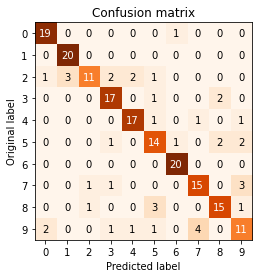

In [ ]:
import matplotlib.pyplot as plt

class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges)
ax.set(xticks=np.arange(confusion_matrix.shape[1]),
        yticks=np.arange(confusion_matrix.shape[0]),
        xticklabels=class_names, yticklabels=class_names, title='Confusion matrix', ylabel='Original label', xlabel='Predicted label')

thresh = confusion_matrix.max() / 2
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, format(confusion_matrix[i, j], 'd'), ha="center", va="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

plt.show()